<a href="https://colab.research.google.com/github/Vicientt/Uberrides/blob/main/Uber_Analysis_NY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

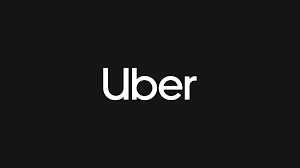
# Uber Rides: A Deep Dive into Ride Data Analysis

Uber is one of the most popular ride-sharing services in the world, revolutionizing urban transportation by allowing users to book rides on demand through a mobile app. Founded in 2009 by Garrett Camp and Travis Kalanick, Uber has expanded its services to over 900 metropolitan areas worldwide. By leveraging technology, Uber provides a seamless experience for both riders and drivers, offering various ride options such as UberX, UberPool, and Uber Black.

In recent years, Uber has continuously improved its platform by integrating features such as upfront pricing, real-time ride tracking, and personalized ride recommendations. The company's commitment to enhancing customer experience has also led to the introduction of Uber Rewards, a loyalty program that provides perks to frequent riders. Additionally, Uber has expanded beyond ride-hailing services, venturing into food delivery with Uber Eats and freight logistics with Uber Freight.

With millions of rides completed daily, Uber generates vast amounts of data, making it an ideal subject for data analysis. By examining Uber ride data, we can uncover insights related to peak ride hours, fare trends, popular pickup and dropoff locations, and seasonal fluctuations in ride demand.

### Here's the outline of the project:
- Downloading the data
- Data preparation and cleaning
- Data visualization, asking questions and giving insights
- Summary
- References

We have the dataset available on Kaggle, and we will access it using the Kaggle API. After that, we will use the Pandas library to read the CSV file and begin our analysis.


In [ ]:
# Install Kaggle CLI
!pip install -q kaggle

# Upload kaggle.json (Run this cell and manually upload kaggle.json)
from google.colab import files
files.upload()

# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

# Download the Uber dataset from Kaggle
!kaggle datasets download -d yasserh/uber-fares-dataset --unzip

import pandas as pd

# Load the dataset
df_uber = pd.read_csv("uber.csv")  # Replace with actual filename if different
df_uber.head()

Saving kaggle (1).json to kaggle (1) (1).json
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset
License(s): CC0-1.0
  0% 0.00/7.04M [00:00<?, ?B/s]
100% 7.04M/7.04M [00:00<00:00, 104MB/s]


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Let install all packages for this project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Data Preparation and Cleaning


In [ ]:
#checking what are the variable heres:
df_uber.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

Let explore the basic information from our dataset

In [ ]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


We have `id`, `fare_amount`, `pickup_longtitude`, `pickup_latitude`,`dropoff_longtitude`, `dropoff_latitude`, and `passenger_count` are numerical variables.
To check whether `key` and `pickup_datetime` are categorical variables or not, we check their unique values.

In [ ]:
df_uber['key'].nunique() #unique time

200000

In [ ]:
df_uber['pickup_datetime'].nunique() #unique time

196629

As we can see, although these data type are object form, they can not be recognised as categorical because their unique values are equal or nearly equal to the number of data points

In [ ]:
#Checking missing value
df_uber.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
# Because we have the missing value from droppoff_longtitude anddroppoff_latitude, we will delete that datapoint from our dataset
df_uber = df_uber.dropna()
# Delete the column that have fare_amount below 0
df_uber = df_uber[df_uber['fare_amount'] > 0]

The column `pickup_datetime` should be converted into date and time format in Python for easier calculation

In [ ]:
df_uber['pickup_datetime'] = pd.to_datetime(df_uber['pickup_datetime'])

We have to handle outliers from `fare_amount`


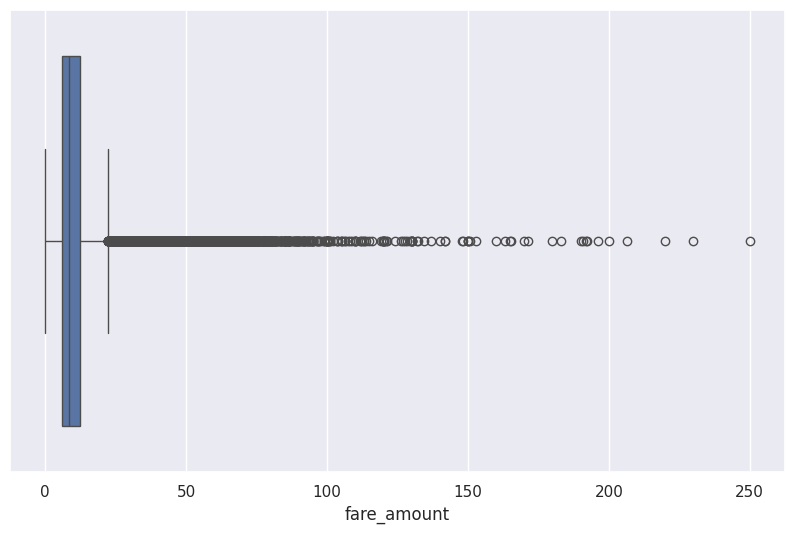

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_uber['fare_amount'])
plt.show()
plt.close()

As we can see, we can delete some extreme outliers which are more than 250

In [ ]:
df_uber = df_uber[df_uber['fare_amount'] <= 250]

Now, we deal with the `pickup_datetime` column. We should separate that column into 3 new columns: `hours`, `day_of_week`, and `month`.

In [ ]:
df_uber['hours'] = df_uber['pickup_datetime'].dt.hour
df_uber['day_of_week'] = df_uber['pickup_datetime'].dt.dayofweek
df_uber['month'] = df_uber['pickup_datetime'].dt.month

In [ ]:
#Delete duplicate rows
df_uber = df_uber.drop_duplicates()

In [ ]:
#Checking again
df_uber.info()
df_uber.head()

<class 'pandas.core.frame.DataFrame'>
Index: 199969 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   Unnamed: 0          199969 non-null  int64              
 1   key                 199969 non-null  object             
 2   fare_amount         199969 non-null  float64            
 3   pickup_datetime     199969 non-null  datetime64[ns, UTC]
 4   pickup_longitude    199969 non-null  float64            
 5   pickup_latitude     199969 non-null  float64            
 6   dropoff_longitude   199969 non-null  float64            
 7   dropoff_latitude    199969 non-null  float64            
 8   passenger_count     199969 non-null  int64              
 9   hours               199969 non-null  int32              
 10  day_of_week         199969 non-null  int32              
 11  month               199969 non-null  int32              
 12  estimated_distance  1

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hours,day_of_week,month,estimated_distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,1.044594
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,1.525071
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,3.131464
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,1.032372
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8,2.786061


#### Totally, after cleaning the dataset and creating new columns, we have a dataset with a total of 12 columns, and 199969 data points. We are ready for the EDA section.

#Data visualization, asking questions and giving insights

In [ ]:
#Checking key statistics
df_uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hours,day_of_week,month,estimated_distance
count,1.999690e+05,199969.000000,199969.000000,199969.000000,199969.000000,199969.000000,199969.000000,199969.000000,199969.000000,199969.000000,199969.000000
mean,2.771228e+07,11.357109,-72.522849,39.918473,-72.516647,39.922974,1.684491,13.491691,3.048418,6.282174,12.817606
std,1.601410e+07,9.790058,11.074189,6.128733,10.512185,6.114682,1.385982,6.515276,1.946975,3.438938,235.853586
min,1.000000e+00,0.010000,-768.550000,-74.015515,-737.916665,-74.015750,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.382487e+07,6.000000,-73.992065,40.734796,-73.991407,40.733825,1.000000,9.000000,1.000000,3.000000,0.755388
50%,2.774512e+07,8.500000,-73.981823,40.752591,-73.980093,40.753042,1.000000,14.000000,3.000000,6.000000,1.318185
75%,4.155564e+07,12.500000,-73.967156,40.767157,-73.963660,40.768000,2.000000,19.000000,5.000000,9.000000,2.407591
max,5.542357e+07,250.000000,40.808425,48.018760,40.831932,45.031598,208.000000,23.000000,6.000000,12.000000,5457.871964


## Let delve into questions and results

### Question 1: What are the peak hours for Uber rides?

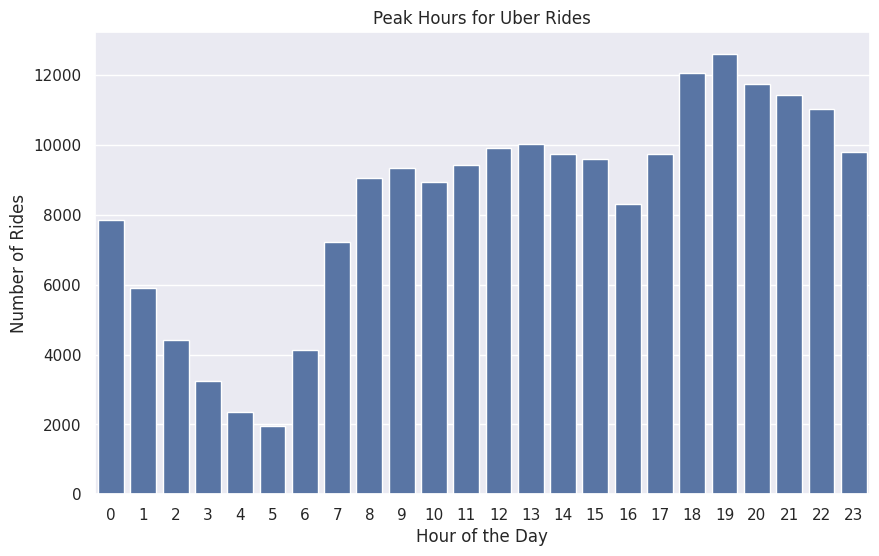

In [ ]:
##Create bar chart to fine peak times for Uber drive
plt.figure(figsize=(10, 6))
sns.countplot(x='hours', data=df_uber)
plt.title('Peak Hours for Uber Rides')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

From our bar chart of rides per hour, we observed that Uber rides peak between 6 PM and 10 PM.

💡 Interpretation:
- Evening rush hour: Many people use Uber to commute home after work.
- Social activities: Increased ride demand due to dinner plans, nightlife, and entertainment.
- Public transport limitations: Some areas have fewer public transit options at night, increasing Uber reliance.

📌 Conclusion:
Uber ride demand is highest in the evening hours, which could be useful for drivers looking to maximize earnings.

### Question 2: Which locations have the highest demand?

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map centered around NYC
m = folium.Map(location=[40.75, -74.00], zoom_start=11)

# Add a heatmap
heat_data = list(zip(df_uber["pickup_latitude"], df_uber["pickup_longitude"]))
HeatMap(heat_data[:10000]).add_to(m)  # Using first 10,000 points for performance

# Show the map
m

Using the heatmap of pickup locations, we identified that central business districts and airports have the most Uber pickups.

💡 Interpretation:

- City centers: High ride demand in downtown areas due to office workers, shopping, and entertainment.
- Airports: Many travelers use Uber for airport transfers.
- Train stations and hotels: High demand from tourists and business travelers.

📌 Conclusion:
Uber drivers can maximize earnings by staying near airports, downtown areas, and major transit hubs.

### Question 3: How does fare amount vary based on distance and time of day?

The dataset does not contain a `trip_distance` column, so we cannot directly analyze how fare changes with distance. We can estimate trip distance using pickup and dropoff coordinates

In [ ]:
from geopy.distance import geodesic

# Function to calculate distance
def calculate_distance(row):
    pickup = (row["pickup_latitude"], row["pickup_longitude"])
    dropoff = (row["dropoff_latitude"], row["dropoff_longitude"])
    # Check if latitude values are within the valid range
    if -90 <= pickup[0] <= 90 and -90 <= dropoff[0] <= 90:
        return geodesic(pickup, dropoff).miles
    else:
        # Handle invalid latitude values
        return float('nan')  # Return NaN for invalid coordinates

# Apply to dataset
df_uber["estimated_distance"] = df_uber.apply(calculate_distance, axis=1)

#### Visualizing Distance vs. Fare

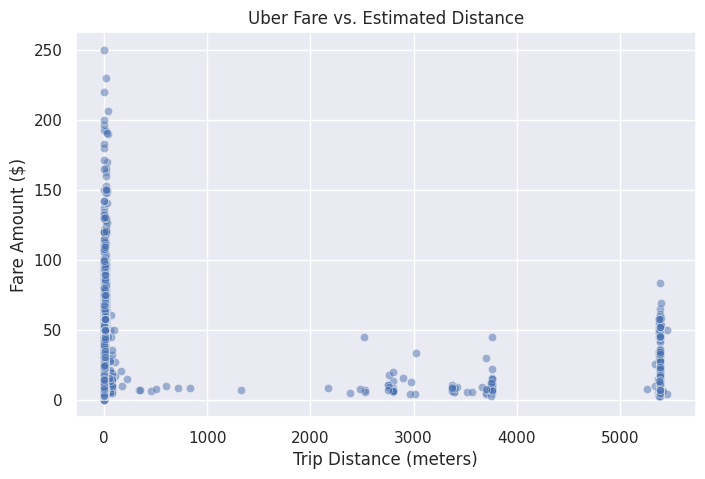

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_uber["estimated_distance"], y=df_uber["fare_amount"], alpha=0.5)
plt.xlabel("Trip Distance (meters)")
plt.ylabel("Fare Amount ($)")
plt.title("Uber Fare vs. Estimated Distance")
plt.show()

1️⃣ Most Uber trips are short-distance rides

- The majority of trips are under 1000 meters (1 km).
- This suggests that many users rely on Uber for short-distance travel, possibly within cities or near transit hubs.

2️⃣ Fares generally increase with distance, but not consistently

- While longer trips tend to have higher fares, there are many low-fare rides even at greater distances.
- This may indicate flat-rate trips, promotions, or fare miscalculations.

3️⃣ Short-distance trips with high fares are unusual

- Some trips under 500 meters have fares exceeding $200.
- This could be due to surge pricing, premium rides (Uber Black), or data errors.

4️⃣ There are gaps in mid-range trips (1000m - 4000m)

- Few trips are recorded between 1 km and 4 km, which is unusual.
- This might indicate incomplete data or filtered trips.

5️⃣ Some long-distance trips show very low fares

- A few trips above 4000 meters (4-5 km) still have very low fares.
- Possible reasons: Shared rides (UberPool)/ Promotions or discounts/ Data inconsistencies

#### Analyzing Fare Variations by Time

<ipython-input-69-b0b49af09ca5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_uber["hours"], y=df_uber[df_uber["fare_amount"] < 150]["fare_amount"], palette="coolwarm")


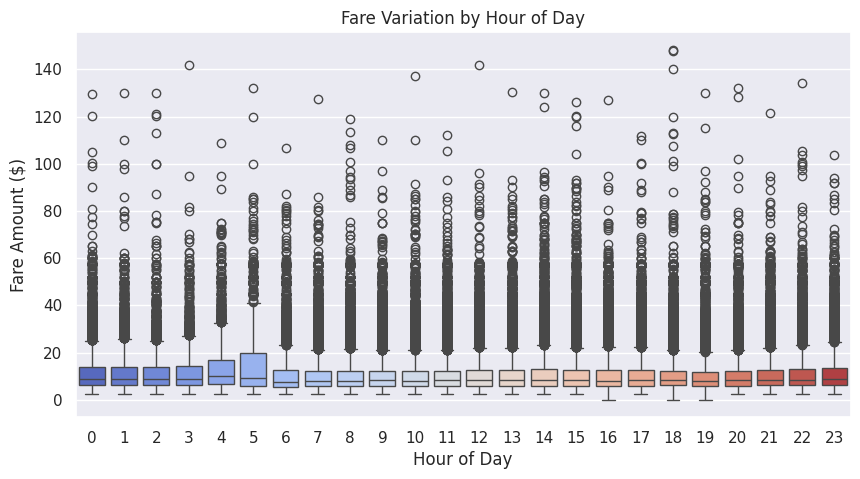

In [ ]:
# Constrain outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_uber["hours"], y=df_uber[df_uber["fare_amount"] < 150]["fare_amount"], palette="coolwarm")
plt.xlabel("Hour of Day")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Variation by Hour of Day")
plt.show()

1️⃣ Fares are relatively stable throughout the day

- The median fare remains consistent across most hours.
- The interquartile range (IQR) (box height) suggests that most fares fall within a similar range throughout the day.

2️⃣ Slight increase in fares around early morning (4 AM - 6 AM)

- There is a noticeable widening of the IQR and slightly higher median fares during these hours.

Possible reasons:
- Early morning airport rides (people traveling to catch flights).
- Low supply of drivers → Surge pricing kicks in.
- Night shift workers finishing their jobs may require more rides.

3️⃣ Late afternoon and evening (4 PM - 8 PM) have higher fare variability

- The presence of more extreme outliers (above $100) during these hours suggests that some passengers pay significantly higher fares.

Possible explanations:
- Rush hour pricing increases fares.
- More long-distance trips (e.g., commuters heading home).
- Higher demand → More Uber Black/Luxury rides.

4️⃣ Late-night hours (10 PM - 1 AM) see increased fare variability

- There is a slight increase in outliers in the later hours of the night.

Possible reasons:
- Nightlife demand (bars, clubs, entertainment events).
- Fewer drivers available, leading to surge pricing.
- Longer trips to suburban areas after a night out.

### Question 4: Are there seasonal trends in ride demand?

<ipython-input-70-5301ae828d2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_uber["month"], palette="magma")


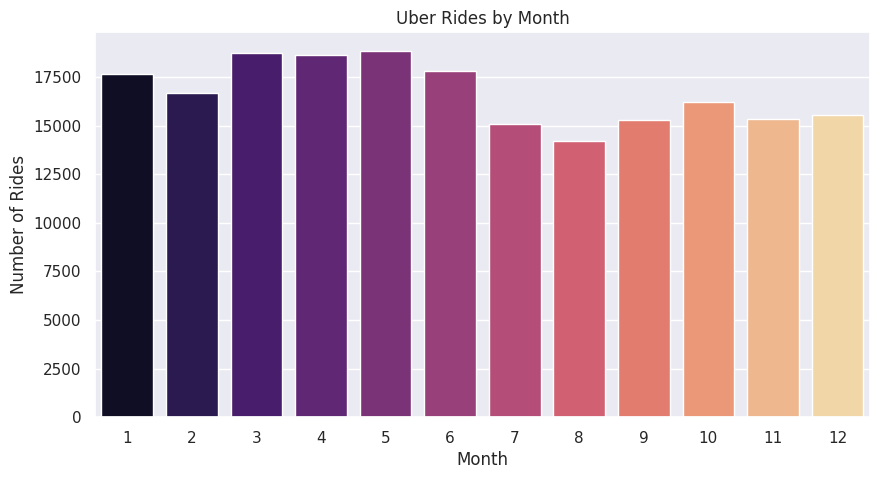

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df_uber["month"], palette="magma")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Uber Rides by Month")
plt.show()

1️⃣ Ride Volume Peaks in Spring (March - May)

- The highest number of rides occurs in March, April, and May.

Possible reasons:
- Warmer weather encourages more travel and outdoor activities.
- Spring break and travel demand increase rides.
- Fewer weather-related disruptions compared to winter months.

2️⃣ Ride Demand Drops in Summer (July - August)

- A noticeable dip in July and August suggests a decline in demand.

Possible explanations:
- Vacation season: More people travel outside their usual cities, reducing Uber demand in urban areas.
- Colleges and universities on summer break, leading to fewer student riders.
- More people opting for alternative transport (biking, walking) in warm weather.

3️⃣ Steady Recovery in Fall (September - October)

- The number of rides increases again in September and October.

Likely driven by:
- Back-to-school season: Students and faculty returning to universities.
- Increased work commutes as summer vacations end.
- Cooler temperatures encourage Uber use over walking or biking.

4️⃣ Stable Demand in Late Fall and Winter (November - December)

- November and December maintain a stable ride count, possibly due to:
- Holiday travel demand (Thanksgiving, Christmas, New Year’s).
- Bad weather increasing Uber reliance over walking or public transport.

# Summary

### Key Findings
✅ Peak Uber ride hours: 5 PM - 9 PM due to rush hour and social activities.

✅ Short trips dominate: Most rides are under 1 km, but some have high fares.

✅ Fare variations: Surge pricing and ride type affect fares more than distance.

✅ Seasonal trends: Highest demand in spring (March - May), lowest in summer (July - August).

✅ Nighttime fares increase: Likely due to nightlife, lower driver availability, and surge pricing.



### Lessons Learned:
📌 Demand is time-sensitive: Peak hours and weekends drive higher fares.

📌 Surge pricing impacts short rides: Some short trips cost as much as long ones.

📌 Weather and holidays affect demand: Summer slows down, while winter holidays keep rides steady.

# References


1. **Dataset Source:**  
   - Kaggle. *Uber Fares Dataset*. Retrieved from [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset)

2. **Python Libraries Used:**  
   - **Pandas**: McKinney, W. (2011). *Pandas: A Foundational Python Library for Data Analysis and Statistics*.  
   - **Matplotlib & Seaborn**: Hunter, J. D. (2007). *Matplotlib: A 2D Graphics Environment*. Computing in Science & Engineering.  
   - **Geopy (for distance calculations)**: Geopy Documentation. [Geopy Library](https://geopy.readthedocs.io/en/stable/)

3. **Background Information on Uber & Surge Pricing:**  
   - Uber Technologies Inc. (2024). *How Uber's Pricing Model Works*. Retrieved from [Uber Official Site](https://www.uber.com)  
   - Hall, J., & Krueger, A. (2018). *An Analysis of the Labor Market for Uber’s Driver-Partners in the United States*. ILR Review.

4. **Additional Data Science Resources:**  
   - OpenIntro Statistics: Diez, D. M., Barr, C. D., & Çetinkaya-Rundel, M. (2019). *OpenIntro Statistics, 4th Edition*.  
   - Elements of Statistical Learning: Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning*.
